In [37]:
import json
import pandas as pd
import numpy as np
import os

In [17]:
run_configs = []
with open("../src/experiment/run_configs/run_configs.json","r") as f:
    for line in f:
        run_configs.append(json.loads(line))


In [18]:
config_df = pd.DataFrame(run_configs)
config_df.set_index("run_number", inplace=True)

In [19]:
results = []
with open("../src/experiment/results/results.json","r") as f:
    for line in f:
        results.append(json.loads(line))

In [20]:
results_df = pd.DataFrame(results)
results_df.set_index("run", inplace=True)

In [21]:
classification_results = []
with open("../src/experiment/results/cluster_results.json","r") as f:
    for line in f:
       classification_results.append(json.loads(line))

In [22]:
classification_results_df = pd.DataFrame(classification_results)
classification_results_df.set_index("run", inplace=True)

In [23]:
merged_results_df = pd.merge(config_df,results_df,left_index=True,right_index=True)

In [24]:
merged_results_df = pd.merge(merged_results_df,classification_results_df,left_index=True,right_index=True)

In [25]:
merged_results_df

,seed,zipf_alpha,training_size,true_dist_size,food_list_name,number_of_person,possibilities_size,monofact_rate,miscalibration_rate,facts_to_possible_hallucinations_ratio,estimated_hallucinations_rate,naive_hallucinations_rate,true_hallucinations_rate,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters
0,42,0.1,800,1000,food_list_small.txt,100,101000,0.995000,0.452007,0.374529,-0.079023,0.027,0.027,0.666667,0.50,0.4,0.500000,0.428571
1,42,0.1,8000,10000,food_list_small.txt,1000,101000,0.924000,0.912587,0.036065,-0.102914,0.157,0.156,0.333333,0.50,0.6,0.500000,0.428571
2,42,0.1,800,1000,food_list_medium.txt,100,311000,1.000000,0.437080,0.375469,-0.060037,0.028,0.028,0.666667,0.50,0.6,0.666667,0.714286
3,42,0.1,8000,10000,food_list_medium.txt,1000,311000,0.975750,0.923799,0.037045,-0.063356,0.197,0.197,0.666667,0.50,0.4,0.500000,0.571429
4,42,0.5,800,1000,food_list_small.txt,100,101000,0.977500,0.447000,0.371240,-0.088227,0.026,0.026,0.333333,0.50,0.4,0.500000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,102,1.5,8000,10000,food_list_medium.txt,1000,311000,0.044000,0.357309,0.002578,-0.394150,0.007,0.007,1.000000,1.00,1.0,1.000000,0.857143
56,102,2.0,800,1000,food_list_small.txt,100,101000,0.017500,0.730000,0.016876,-0.976863,0.000,0.000,0.333333,0.50,0.6,0.666667,0.571429
57,102,2.0,8000,10000,food_list_small.txt,1000,101000,0.006375,0.875635,0.000516,-0.948038,0.000,0.000,0.666667,0.75,0.8,0.833333,0.857143
58,102,2.0,800,1000,food_list_medium.txt,100,311000,0.015000,0.712719,0.016876,-0.962082,0.000,0.000,0.333333,0.50,0.6,0.500000,0.428571


In [26]:
merged_results_df.sort_values(by=["seed","training_size","possibilities_size"], ascending=True)

,seed,zipf_alpha,training_size,true_dist_size,food_list_name,number_of_person,possibilities_size,monofact_rate,miscalibration_rate,facts_to_possible_hallucinations_ratio,estimated_hallucinations_rate,naive_hallucinations_rate,true_hallucinations_rate,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters
20,15,0.1,800,1000,food_list_small.txt,100,101000,1.000000,0.454000,0.375469,-0.076957,0.046,0.046,0.333333,0.50,0.4,0.333333,0.428571
24,15,0.5,800,1000,food_list_small.txt,100,101000,0.982500,0.453000,0.372180,-0.090167,0.031,0.031,0.666667,0.50,0.4,0.333333,0.285714
28,15,1.0,800,1000,food_list_small.txt,100,101000,0.535000,0.282520,0.233150,-0.228157,0.009,0.009,0.666667,0.75,0.4,0.500000,0.428571
32,15,1.5,800,1000,food_list_small.txt,100,101000,0.090000,0.296643,0.052978,-0.507109,0.001,0.001,0.666667,0.50,0.6,0.666667,0.571429
36,15,2.0,800,1000,food_list_small.txt,100,101000,0.020000,0.768889,0.015938,-1.012315,0.000,0.000,0.666667,0.75,0.6,0.833333,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,102,0.1,8000,10000,food_list_medium.txt,1000,311000,0.974250,0.923599,0.037022,-0.064633,0.189,0.188,0.000000,0.00,0.0,0.000000,0.142857
47,102,0.5,8000,10000,food_list_medium.txt,1000,311000,0.940375,0.923189,0.036323,-0.097400,0.225,0.224,0.000000,0.00,0.0,0.000000,0.142857
51,102,1.0,8000,10000,food_list_medium.txt,1000,311000,0.433125,0.563374,0.019004,-0.227516,0.116,0.116,1.000000,1.00,0.8,0.833333,0.857143
55,102,1.5,8000,10000,food_list_medium.txt,1000,311000,0.044000,0.357309,0.002578,-0.394150,0.007,0.007,1.000000,1.00,1.0,1.000000,0.857143


In [27]:
numeric_df = merged_results_df[merged_results_df.select_dtypes(["number"]).columns]

In [28]:
group_1 = numeric_df.groupby(["training_size","zipf_alpha","possibilities_size"])

In [29]:
grouped_results = group_1.agg(['mean', 'std'])

In [30]:
grouped_results

seed            true_dist_size  \
                                              mean        std           mean   
training_size zipf_alpha possibilities_size                                    
800           0.1        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              0.5        101000              53.00  44.530888         1000.0   
                         311000              50.25  36.772952         1000.0   
              1.0        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              1.5        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              2.0        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
8000          0.1        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              0.5        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              1.0        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              1.5        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              2.0        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   

                                                 number_of_person       \
                                             std             mean  std   
training_size zipf_alpha possibilities_size                              
800           0.1        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              0.5        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              1.0        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              1.5        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              2.0        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
8000          0.1        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              0.5        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              1.0        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              1.5        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              2.0        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   

                                            monofact_rate            \
                                                     mean       std   
training_size zipf_alpha possibilities_size                           
800           0.1        101000                  0.995833  0.003819   
                         311000                  0.999167  0.001443   
              0.5        101000                  0.978333  0.003819   
                         311000                  0.993125  0.001250   
     

In [31]:
grouped_results.columns = ['_'.join(col).strip() for col in grouped_results.columns.values]

In [32]:
grouped_results.reset_index(inplace=True)

In [33]:
plot_data_1 = grouped_results[(grouped_results['training_size'] == 800) & (grouped_results['possibilities_size'] == 101000)]

In [34]:
plot_data_2 = grouped_results[(grouped_results['training_size'] == 800) & (grouped_results['possibilities_size'] == 311000)]

In [35]:
plot_data_3 = grouped_results[(grouped_results['training_size'] == 8000) & (grouped_results['possibilities_size'] == 101000)]

In [36]:
plot_data_4 = grouped_results[(grouped_results['training_size'] == 8000) & (grouped_results['possibilities_size'] == 311000)]

In [39]:
plot_data_3

,training_size,zipf_alpha,possibilities_size,seed_mean,seed_std,true_dist_size_mean,true_dist_size_std,number_of_person_mean,number_of_person_std,monofact_rate_mean,...,3_clusters_mean,3_clusters_std,4_clusters_mean,4_clusters_std,5_clusters_mean,5_clusters_std,6_clusters_mean,6_clusters_std,7_clusters_mean,7_clusters_std
10,8000,0.1,101000,53.0,44.530888,10000.0,0.0,1000.0,0.0,0.921250,...,0.111111,0.19245,0.166667,0.288675,0.200000,0.34641,0.222222,0.254588,0.190476,0.218218
12,8000,0.5,101000,53.0,44.530888,10000.0,0.0,1000.0,0.0,0.853625,...,0.222222,0.19245,0.166667,0.144338,0.200000,0.20000,0.333333,0.166667,0.380952,0.164957
14,8000,1.0,101000,53.0,44.530888,10000.0,0.0,1000.0,0.0,0.368167,...,0.777778,0.19245,0.750000,0.250000,0.800000,0.20000,0.888889,0.096225,0.857143,0.142857
16,8000,1.5,101000,53.0,44.530888,10000.0,0.0,1000.0,0.0,0.043417,...,0.888889,0.19245,0.916667,0.144338,0.866667,0.11547,0.777778,0.096225,0.761905,0.082479
18,8000,2.0,101000,53.0,44.530888,10000.0,0.0,1000.0,0.0,0.007542,...,0.666667,0.00000,0.750000,0.000000,0.733333,0.11547,0.777778,0.096225,0.761905,0.082479


In [22]:
def plot_line(ax,data_df,x_name,y_mean_name,y_std_name,color,marker, linestyle, label):
    data_df.plot(x=x_name, y=y_mean_name, marker=marker, linestyle=linestyle, ax=ax,color=color, label=label)
    ax.fill_between(data_df[x_name], 
                data_df[y_mean_name] - data_df[y_std_name], 
                data_df[y_mean_name] + data_df[y_std_name], 
                color=color, alpha=0.3)
    

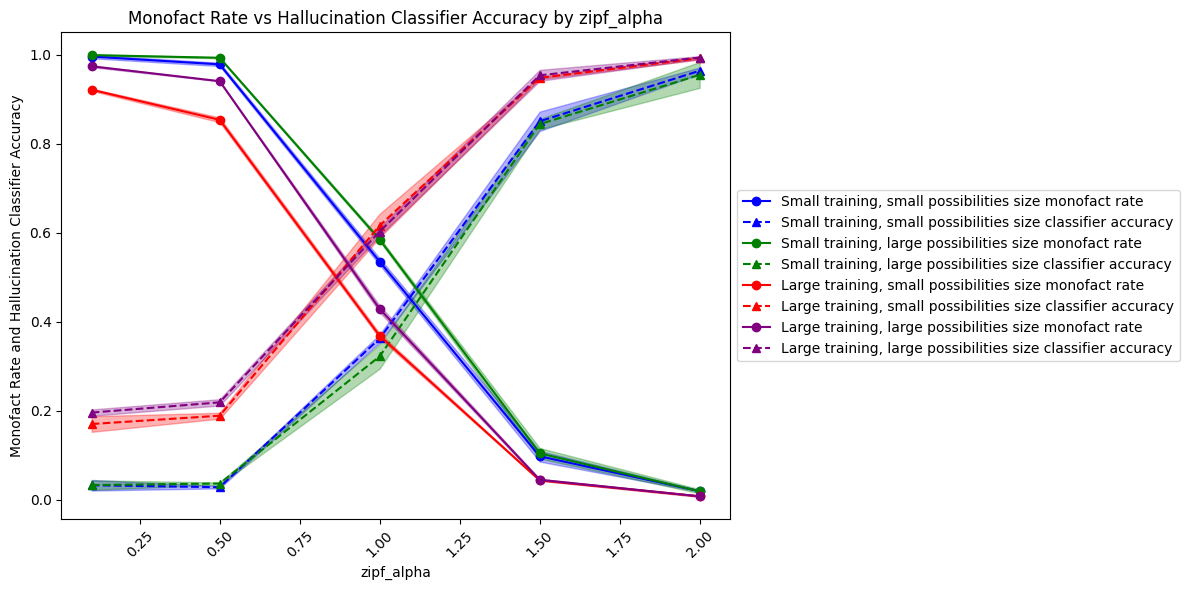

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","accuracy_mean","accuracy_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size classifier accuracy")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","accuracy_mean","accuracy_std","green",marker="^",linestyle="--",label="Small training, large possibilities size classifier accuracy")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","accuracy_mean","accuracy_std","red",marker="^",linestyle="--",label="Large training, small possibilities size classifier accuracy")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","purple",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","accuracy_mean","accuracy_std","purple",marker="^",linestyle="--",label="Large training, large possibilities size classifier accuracy")


# # Large possibilities size
# plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
# plot_line(ax,plot_data_2,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")
# 
# # Large training size
# # Small possibilities size
# plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
# plot_line(ax,plot_data_3,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# # Large possibilities size 
# plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
# plot_line(ax,plot_data_4,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact Rate and Hallucination Classifier Accuracy')
ax.set_title('Monofact Rate vs Hallucination Classifier Accuracy by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

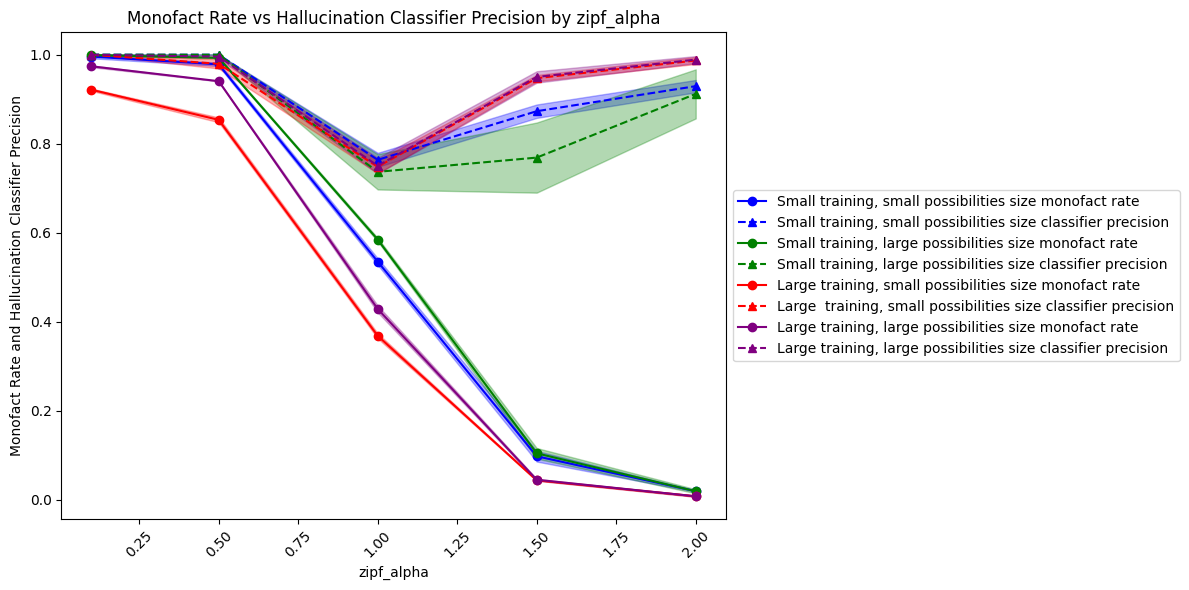

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","precision_mean","precision_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size classifier precision")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","precision_mean","precision_std","green",marker="^",linestyle="--",label="Small training, large possibilities size classifier precision")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","precision_mean","precision_std","red",marker="^",linestyle="--",label="Large  training, small possibilities size classifier precision")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","purple",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","precision_mean","precision_std","purple",marker="^",linestyle="--",label="Large training, large possibilities size classifier precision")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact Rate and Hallucination Classifier Precision')
ax.set_title('Monofact Rate vs Hallucination Classifier Precision by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

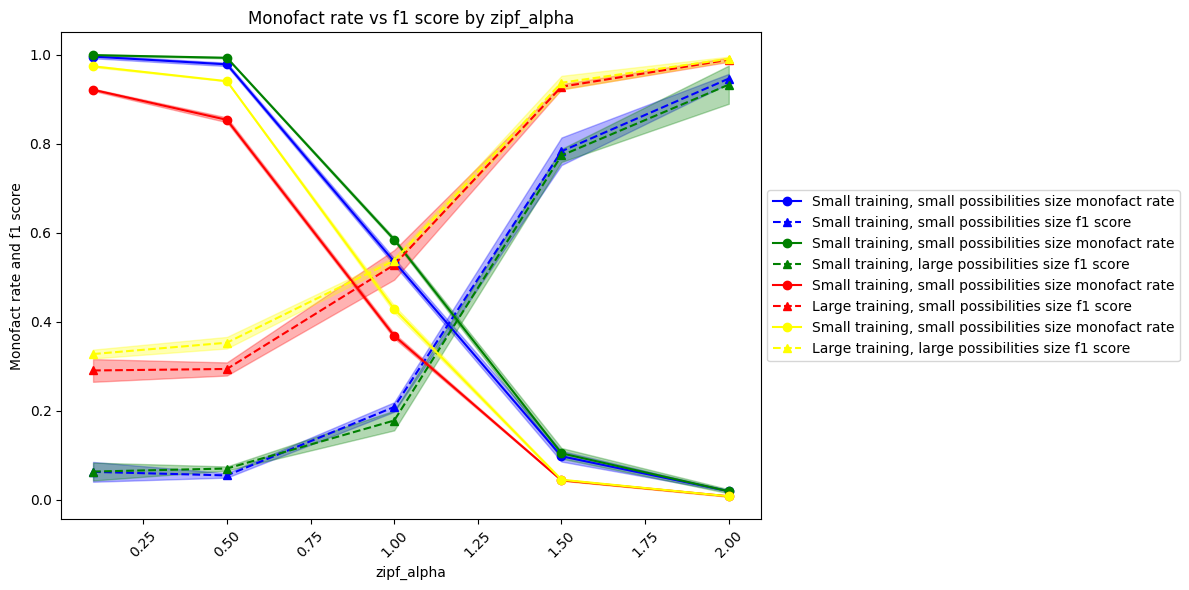

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","f1_mean","f1_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size f1 score")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","f1_mean","f1_std","green",marker="^",linestyle="--",label="Small training, large possibilities size f1 score")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","f1_mean","f1_std","red",marker="^",linestyle="--",label="Large training, small possibilities size f1 score")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","yellow",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","f1_mean","f1_std","yellow",marker="^",linestyle="--",label="Large training, large possibilities size f1 score")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact rate and f1 score')
ax.set_title('Monofact rate vs f1 score by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
plot_data_5 = grouped_results

C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3472721386.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3472721386.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


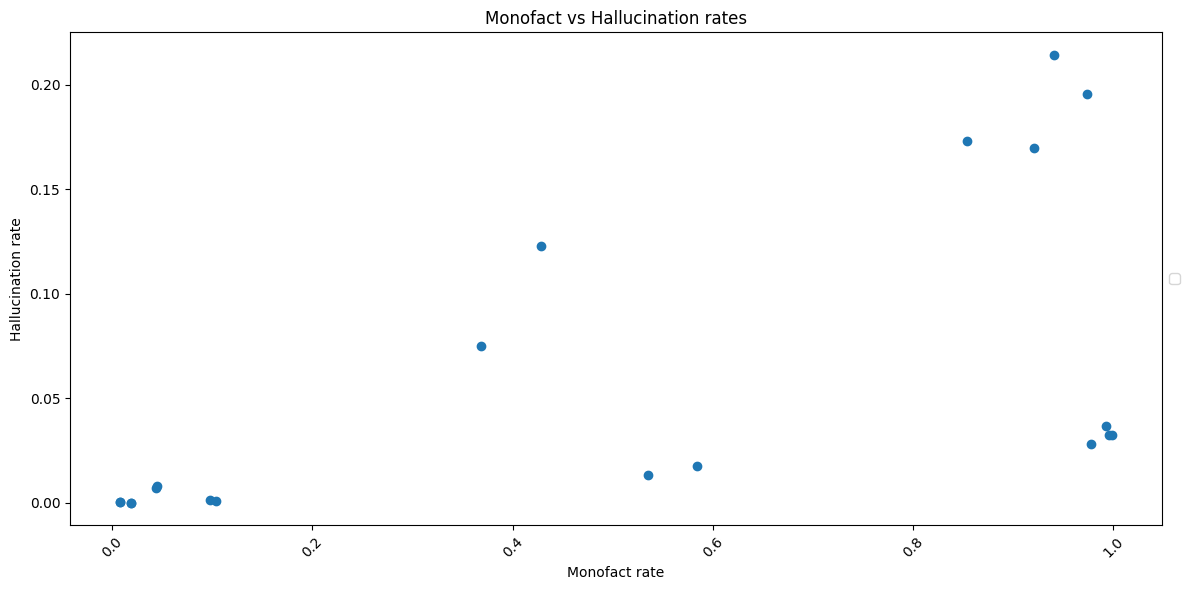

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)


ax.plot(plot_data_5['monofact_rate_mean'], plot_data_5['true_hallucinations_rate_mean'], 'o')  # 'o' for scatter plot
ax.set_xlabel('Monofact rate')
ax.set_ylabel('Hallucination rate')
#plot_line(ax,plot_data_1,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")


ax.set_title('Monofact vs Hallucination rates')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

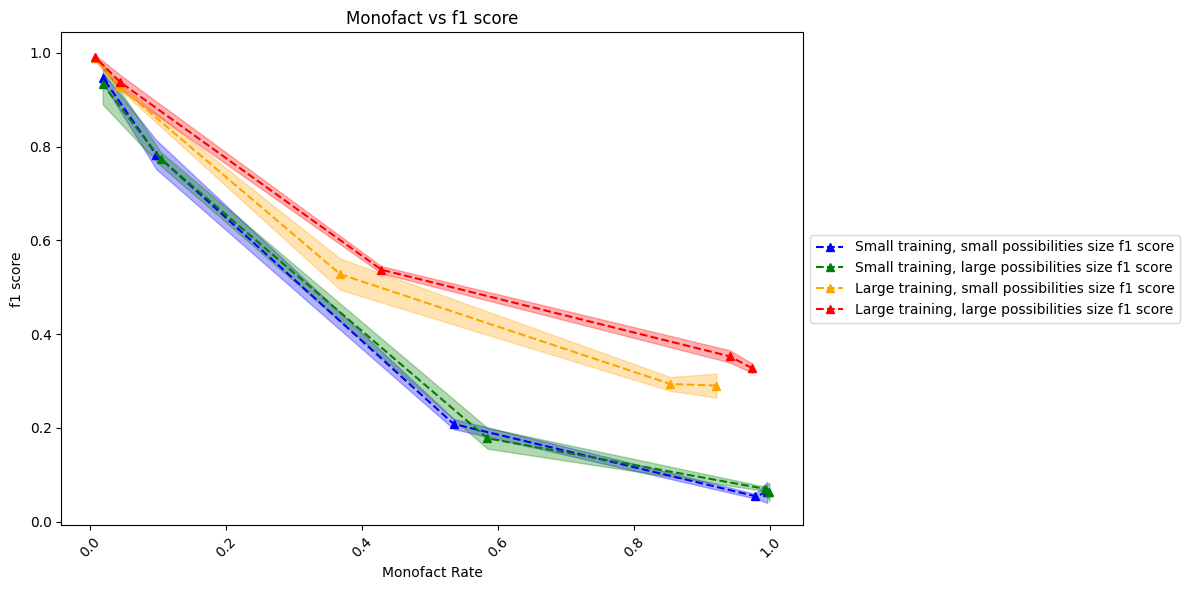

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"monofact_rate_mean","f1_mean","f1_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size f1 score")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"monofact_rate_mean","f1_mean","f1_std","green",marker="^",linestyle="--",label="Small training, large possibilities size f1 score")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"monofact_rate_mean","f1_mean","f1_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size f1 score")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"monofact_rate_mean","f1_mean","f1_std","red",marker="^",linestyle="--",label="Large training, large possibilities size f1 score")

# Add labels and title
ax.set_xlabel('Monofact Rate')
ax.set_ylabel('f1 score')
ax.set_title('Monofact vs f1 score')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

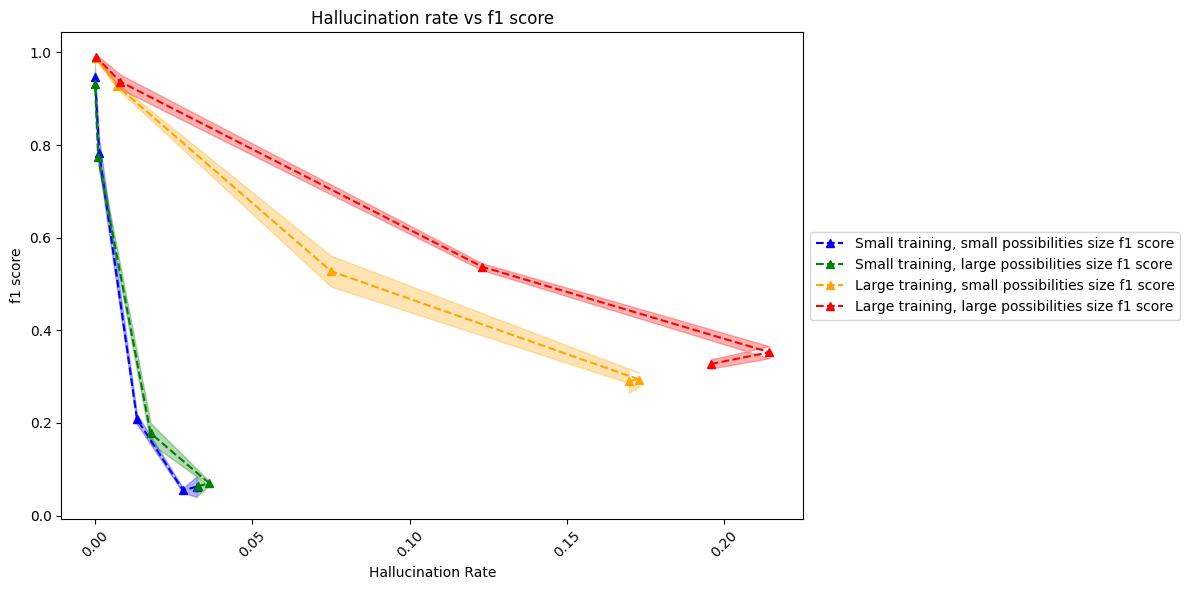

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"true_hallucinations_rate_mean","f1_mean","f1_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size f1 score")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"true_hallucinations_rate_mean","f1_mean","f1_std","green",marker="^",linestyle="--",label="Small training, large possibilities size f1 score")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"true_hallucinations_rate_mean","f1_mean","f1_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size f1 score")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"true_hallucinations_rate_mean","f1_mean","f1_std","red",marker="^",linestyle="--",label="Large training, large possibilities size f1 score")

# Add labels and title
ax.set_xlabel('Hallucination Rate')
ax.set_ylabel('f1 score')
ax.set_title('Hallucination rate vs f1 score')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

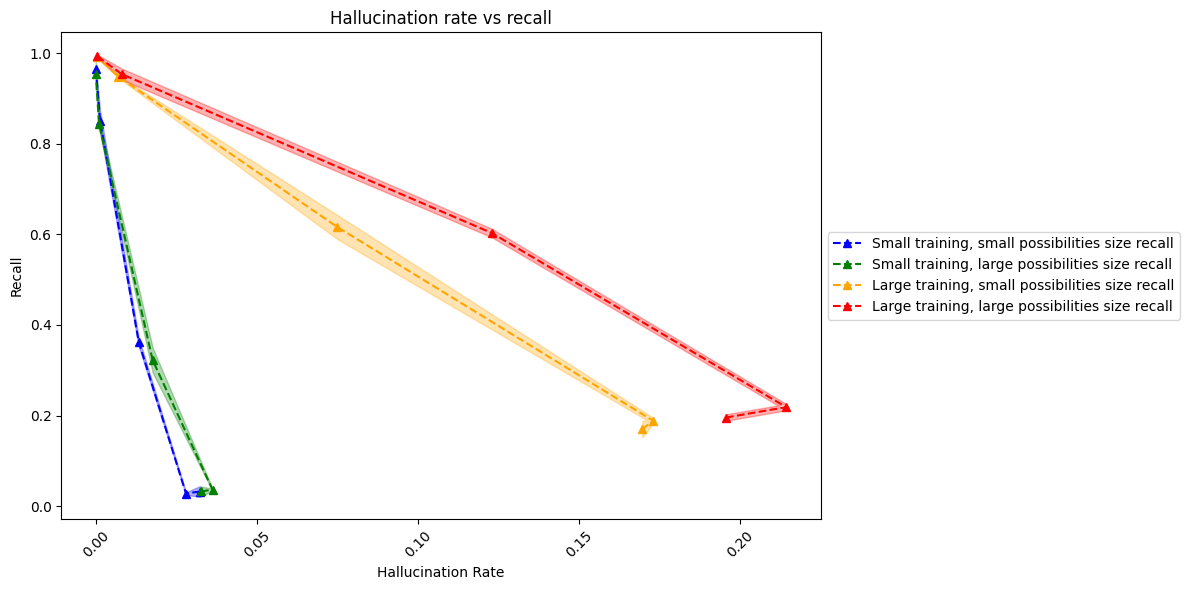

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"true_hallucinations_rate_mean","recall_mean","recall_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size recall")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"true_hallucinations_rate_mean","recall_mean","recall_std","green",marker="^",linestyle="--",label="Small training, large possibilities size recall")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"true_hallucinations_rate_mean","recall_mean","recall_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size recall")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"true_hallucinations_rate_mean","recall_mean","recall_std","red",marker="^",linestyle="--",label="Large training, large possibilities size recall")

# Add labels and title
ax.set_xlabel('Hallucination Rate')
ax.set_ylabel('Recall')
ax.set_title('Hallucination rate vs recall')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

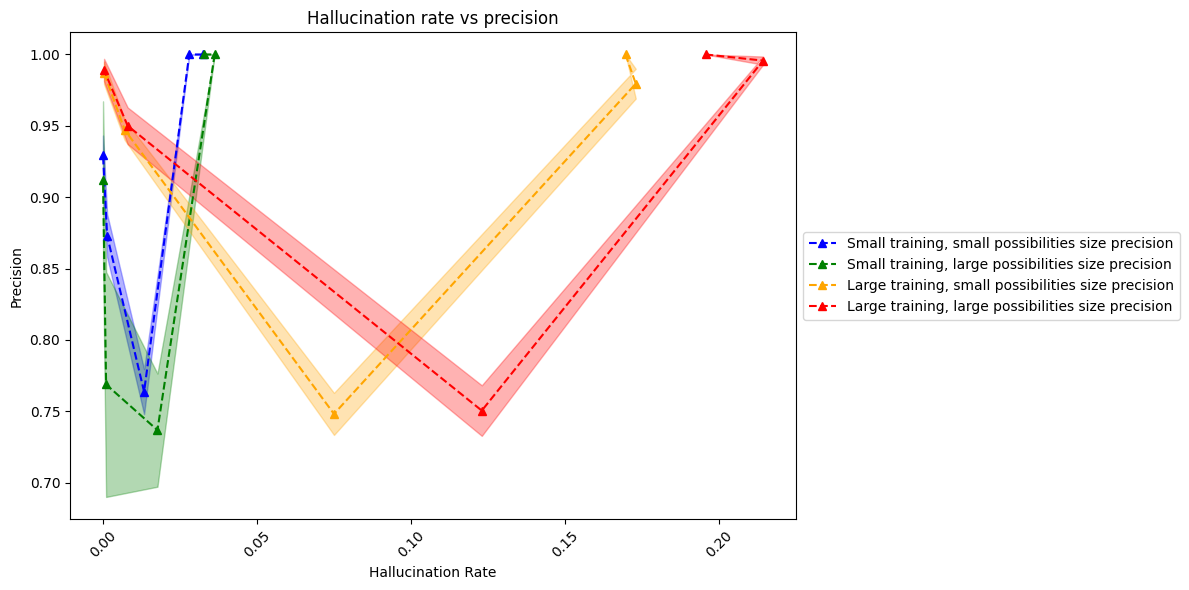

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"true_hallucinations_rate_mean","precision_mean","precision_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size precision")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"true_hallucinations_rate_mean","precision_mean","precision_std","green",marker="^",linestyle="--",label="Small training, large possibilities size precision")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"true_hallucinations_rate_mean","precision_mean","precision_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size precision")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"true_hallucinations_rate_mean","precision_mean","precision_std","red",marker="^",linestyle="--",label="Large training, large possibilities size precision")

# Add labels and title
ax.set_xlabel('Hallucination Rate')
ax.set_ylabel('Precision')
ax.set_title('Hallucination rate vs precision')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
plot_data_1_calibration = plot_data_1
plot_data_2_calibration = plot_data_2
plot_data_3_calibration = plot_data_3
plot_data_4_calibration = plot_data_4
plot_data_1_calibration["miscalibration_rate_mean"] = 1 - plot_data_1["miscalibration_rate_mean"]
plot_data_2_calibration["miscalibration_rate_mean"] = 1 - plot_data_2["miscalibration_rate_mean"]
plot_data_3_calibration["miscalibration_rate_mean"] = 1 - plot_data_3["miscalibration_rate_mean"]
plot_data_4_calibration["miscalibration_rate_mean"] = 1 - plot_data_4["miscalibration_rate_mean"]

C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_1_calibration["miscalibration_rate_mean"] = 1 - plot_data_1["miscalibration_rate_mean"]
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_2_calibration["miscalibration_rate_mean"] = 1 - plot_data_2["miscalibration_rate_mean"]
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:7: SettingWithCopyWarning: 
A

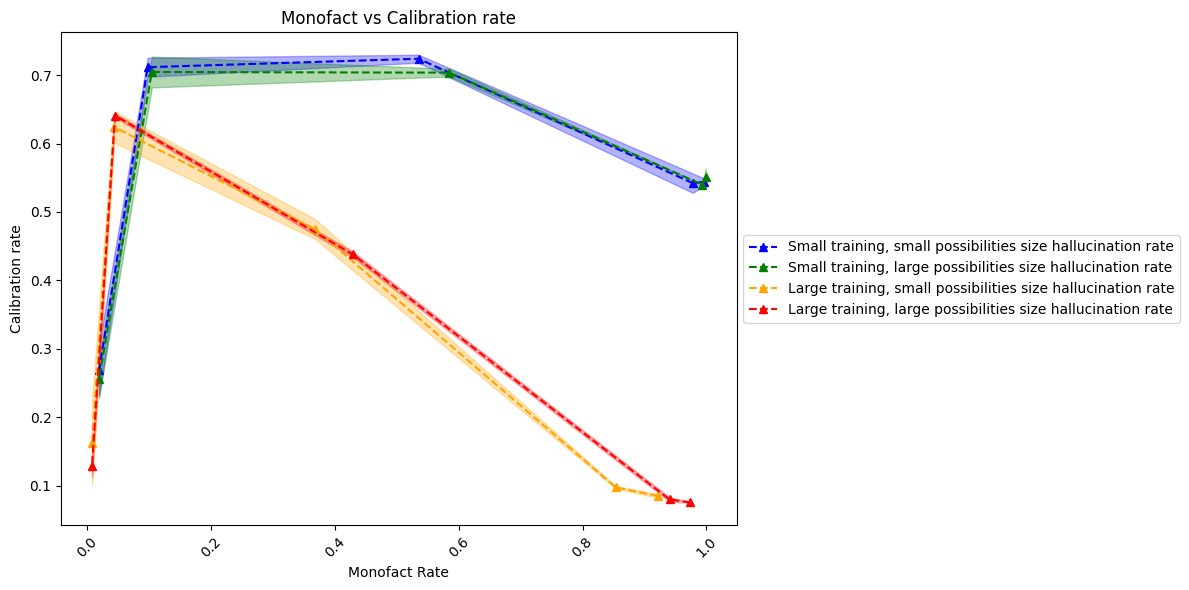

In [158]:
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")

# Add labels and title
ax.set_xlabel('Monofact Rate')
ax.set_ylabel('Calibration rate')
ax.set_title('Monofact vs Calibration rate')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

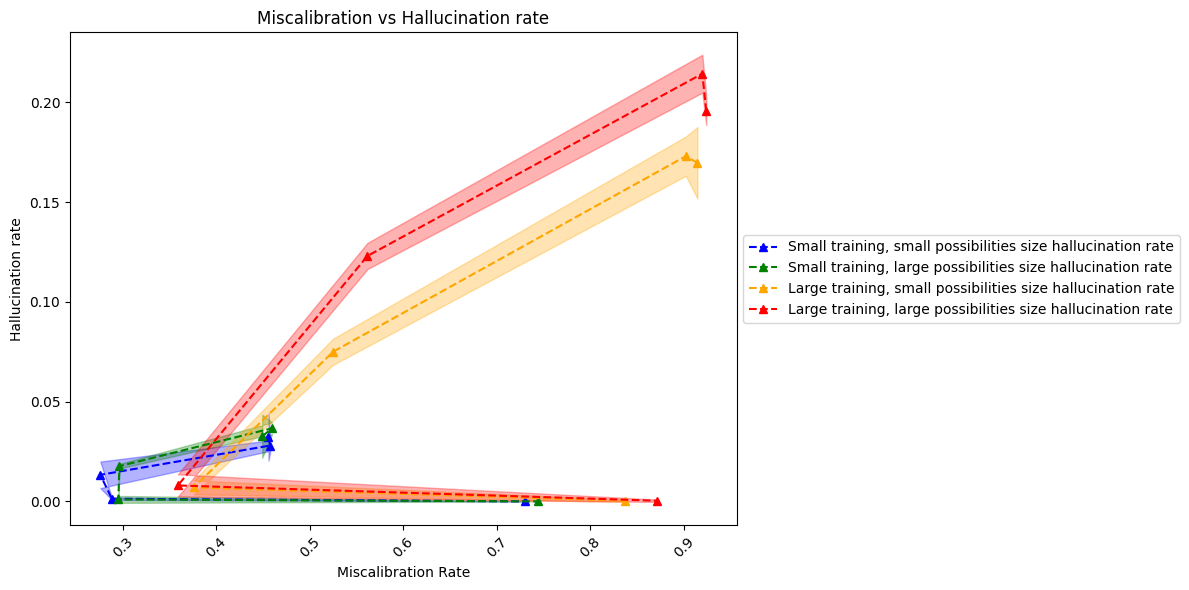

In [148]:
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")

# Add labels and title
ax.set_xlabel('Miscalibration Rate')
ax.set_ylabel('Hallucination rate')
ax.set_title('Miscalibration vs Hallucination rate')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()